In [20]:
import mdtraj as md
from msmbuilder.featurizer import DihedralFeaturizer
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
from msmbuilder.example_datasets import AlanineDipeptide, fetch_alanine_dipeptide

In [7]:
fetch_alanine_dipeptide('.')

alanine_dipeptide already is cached


{'DESCR': 'The dataset consists of ten 10ns trajectories of of alanine dipeptide,\nsimulated using OpenMM 6.0.1 (CUDA platform, NVIDIA GTX660) with the\nAMBER99SB-ILDN force field at 300K (langevin dynamics, friction coefficient\nof 91/ps, timestep of 2fs) with GBSA implicit solvent. The coordinates are\nsaved every 1ps. Each trajectory contains 9,999 snapshots.\n\nThe dataset, including the script used to generate the dataset\nis available on figshare at\n\nhttp://dx.doi.org/10.6084/m9.figshare.1026131\n',
 'trajectories': [<mdtraj.Trajectory with 9999 frames, 22 atoms, 3 residues, without unitcells at 0x1151d7a90>,
  <mdtraj.Trajectory with 10000 frames, 22 atoms, 3 residues, without unitcells at 0x1151d7d30>,
  <mdtraj.Trajectory with 10000 frames, 22 atoms, 3 residues, without unitcells at 0x1151d7eb8>,
  <mdtraj.Trajectory with 10000 frames, 22 atoms, 3 residues, without unitcells at 0x1151d7c50>,
  <mdtraj.Trajectory with 10000 frames, 22 atoms, 3 residues, without unitcells at 0

In [11]:
traj = md.load('alanine_dipeptide/trajectory-0.dcd', top='alanine_dipeptide/ala2.pdb')

In [12]:
top = traj.topology

In [16]:
traj_array = traj.xyz.reshape(-1, traj.xyz.shape[1]*traj.xyz.shape[2])

In [19]:
traj_array.shape

(9999, 66)

In [21]:
np.save('ala-0.npy', traj_array)

In [22]:
heavy = top.select("name =~ '[^H].*'")

In [25]:
df, _ = top.to_dataframe()
df

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,H1,H,1,ACE,0,
1,2,CH3,C,1,ACE,0,
2,3,H2,H,1,ACE,0,
3,4,H3,H,1,ACE,0,
4,5,C,C,1,ACE,0,
5,6,O,O,1,ACE,0,
6,7,N,N,2,ALA,0,
7,8,H,H,2,ALA,0,
8,9,CA,C,2,ALA,0,
9,10,HA,H,2,ALA,0,


In [34]:
dihed = DihedralFeaturizer(sincos=False).partial_transform(traj)


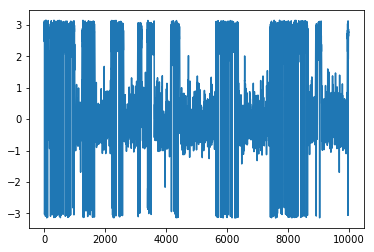

In [38]:
plt.plot(dihed[:,1], alpha=1)

In [40]:
np.save('ala-dihed.npy', dihed)